# Integrales dobles
**Integrantes**
- Integrante 1: Hissam Quintero Avilez
- Integrante 2: Arturo Velgis García
- Integrante 3: José Manuel Lira Aguas

## Integración en regiones rectangulares
Si queremos integrar una funcion $f(x,y)$ en una region $R=[a,b]\times[c,d]$ 
![](https://cnx.org/resources/1004b01a48a68e948e28de33b654e16eb84ddd39/CNX_Calc_Figure_15_01_001.jpg)
Se puede usar la aproximacion:
$$\int_a^b\int_c^d f(x,y)dydx\approx \frac{(b-a)(d-c)}{N}\sum_{i=1}^N f(x_i,y_i)$$


donde $x_i, y_i$ son variables aleatorias distribuidas uniformemente en $[a,b],\ y\ [c,d]$ respectivamente
$$x_i\sim\mathcal{U}\left[a,b\right]$$
$$y_i\sim\mathcal{U}\left[c,d\right]$$

## Integración en regiones no rectangulares
Si queremos integrar una función $f(x,y)$ en una region $D$ (como se muestra en la figura)
![fig2](fig2.png)
Se utiliza el siguiente teorema (1):
$$\iint_D f(x,y)dA=\iint_R F(x,y)dA$$ donde $D\subset R=[a,b]\times[c,d]$ y $F$ esta dada por:
$$ F(x,y)= \Bigg \{ \begin{matrix} f(x,y)\ si\ (x,y)\in D \\ 0\ si\ (x,y)\in R\ pero\  (x,y)\notin D \end{matrix} $$
![fig3](fig3.png)
De esta forma, se puede utilizar la misma aproximacion que antes:
$$\iint_D f(x,y)dA=\iint_R F(x,y)dR\approx \frac{(b-a)(d-c)}{N}\sum_{i=1}^N F(x_i,y_i) $$


In [1]:
import numpy as np
import math
import pandas as pd
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
%matplotlib inline

#regiones rectangulares
def int_montecarlo1(funcion, a, b, c, d, N):
    u_x = np.random.uniform(a, b, N)
    u_y = np.random.uniform(c, d, N)
    return (b - a) * (d - c) / N * funcion(u_x, u_y).sum()
    
#regiones no rectangulares

def F(region, funcion,x,y):
    if region(x, y):
        return funcion(x, y)
    else:
        return 0
    
def int_montecarlo2(region, funcion, a, b, c, d, N):
    fsum = 0
    u_x = np.random.uniform(a, b, N)
    u_y = np.random.uniform(c, d, N)
    for i in range (N):
        fsum = fsum + F(region, funcion, u_x[i], u_y[i])
    return (b - a) * (d - c) / N * fsum



### Ejemplos regiones rectangulares
$$I_1=\int_{-1}^1 \int_{-2}^2 \sqrt{1-x^2}dydx$$

$$I_2=\int_{0}^2\int_1^2 x-3y^2 dydx$$


#### Soluciones analiticas:
$$I_1=2\pi$$
$$I_2=-12$$


In [6]:
#funciones
def f1(x, y):
    return (1 - x**2)**.5
def f2(x, y):
    return x - 3 * y**2

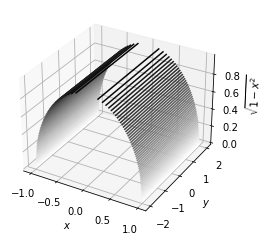

In [7]:
#graficas: f1
x1 = np.linspace(-1, 1)
y1 = np.linspace(-2, 2)
X1, Y1 = np.meshgrid(x1, y1)
Z1 = f1(X1, Y1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, Y1, Z1, 50, cmap='binary')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$\sqrt{1-x^2}$');

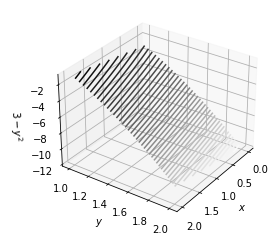

In [12]:
#graficas: f2
x2 = np.linspace(0, 2)
y2 = np.linspace(1, 2)
X2, Y2 = np.meshgrid(x2, y2)
Z2 = f2(X2, Y2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X2, Y2, Z2, 50, cmap='binary')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$3-y^2$')
ax.view_init(30, 35)
fig;

In [4]:
#integrales
N = np.logspace(1, 7, 7).astype(int)
tabla = pd.DataFrame(index=N, columns=['I1 aprox:', '%error1:', 'I2 aprox:', '%error2'])
for n in N:
    I_1 = tabla.loc[n, 'I1 aprox:'] = int_montecarlo1(funcion=f1, a=-1, b=1, c=-2, d=2, N=n)
    tabla.loc[n, '%error1:'] = 100 * np.abs(2 * math.pi - I_1) / (2 * math.pi) 
    I_2 = tabla.loc[n, 'I2 aprox:'] = int_montecarlo1(funcion=f2, a=-0, b=2, c=1, d=2, N=n)
    tabla.loc[n, '%error2'] = 100 * np.abs(-12 - I_2) / 12 
tabla

,I1 aprox:,%error1:,I2 aprox:,%error2
10,6.79877,8.20585,-10.8707,9.41062
100,5.99181,4.63742,-11.8453,1.28906
1000,6.20608,1.22724,-12.1149,0.957444
10000,6.28614,0.0469499,-12.0545,0.454287
100000,6.28116,0.0322758,-12.009,0.0753017
1000000,6.28364,0.00724746,-12.0038,0.0317984
10000000,6.28262,0.00906285,-12.0013,0.0107281


### Ejemplos regiones no rectangulares
$$I_3=\iint_D x^2+y^2 dD,\ D={(x,y): 2\leq x\leq y\leq6}$$ 

$$I_4= \iint_D y^2+cos^2(x^2),\ D={(x,y): \frac{x^2}{16}+\frac{y^2}{36}\leq 1} $$

#### Soluciones analiticas
$$I_3=832/3\approx 277$$
$$I_4=230\pi$$

In [48]:
def region1(x, y):
    return 2 < x < y < 6
#esta funcion es solo para graficar la region1, la anterior no se podia graficar
def region1_graf(x, y):
    return np.logical_and(2 < x, np.logical_and(x < y, y < 6))

def f3(x, y):
    return x**2 + y**2

def region2(x, y):
    return x**2 / 16 + y**2 / 36 < 1

def f4(x, y):
    return np.cos(x**2)**2 + y**2

Se grafican las regiones para elegir un rectangulo que las contenga

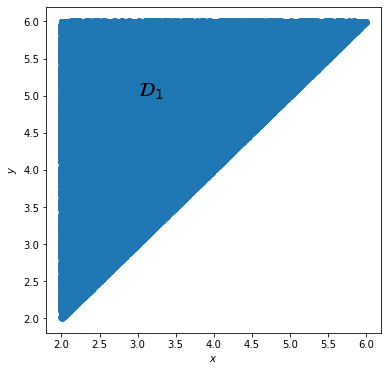

In [49]:
x = np.random.uniform(2, 6, 1000000)
y = np.random.uniform(2, 6, 1000000)

plt.figure(figsize=(6,6))
dentro_region1 = region1_graf(x, y)
plt.scatter(x[dentro_region1], y[dentro_region1])
plt.text(3,5,'$\mathcal{D}_1$',fontsize=20)

plt.xlabel('$x$')
plt.ylabel('$y$');

Para la primer region $R=[2,6]\times[2,6]$

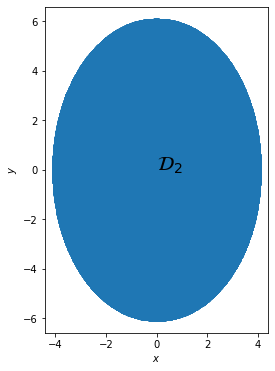

In [50]:
x = np.random.uniform(-4, 4, 1000000)
y = np.random.uniform(-6, 6, 1000000)

plt.figure(figsize=(4,6))
dentro_region2 = region2(x, y)
plt.scatter(x[dentro_region2], y[dentro_region2])
plt.text(0,0,'$\mathcal{D}_2$',fontsize=20)

plt.xlabel('$x$')
plt.ylabel('$y$');

Para esta region $R=[-4,4]\times [-6,6]$

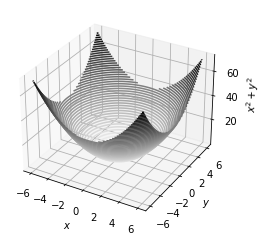

In [51]:
#graficas: f3
x3 = np.linspace(-6, 6)
y3 = np.linspace(-6, 6)
X3, Y3 = np.meshgrid(x3, y3)
Z3 = f3(X3, Y3)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X3, Y3, Z3, 50, cmap='binary')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$x^2+y^2$');

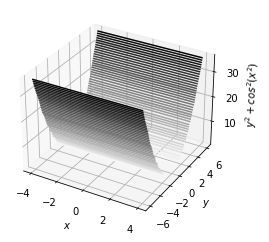

In [52]:
#graficas: f4
x4 = np.linspace(-4, 4)
y4 = np.linspace(-6, 6)
X4, Y4 = np.meshgrid(x4, y4)
Z4 = f4(Y4, Y4)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X4, Y4, Z4, 50, cmap='binary')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$y^2+cos^2(x^2)$');

In [54]:
a_1, b_1, c_1, d_1= 2, 6, 2, 6
a_2, b_2, c_2, d_2= -4, 4, -6, 6
N = np.logspace(1, 6, 6).astype(int)
tabla = pd.DataFrame(index=N, columns=['I3 aprox:', '%error3:', 'I4 aprox:', '%error4:'])
for n in N:
    I_3 = tabla.loc[n, 'I3 aprox:'] = int_montecarlo2(region1, f3, a=a_1, b=b_1, c=c_1, d=d_1, N=n)
    tabla.loc[n, '%error3:'] = 100 * np.abs(832 / 3 - I_3) / (832 / 3) 
    I_4 = tabla.loc[n, 'I4 aprox:'] = int_montecarlo2(region2, f4, a=a_2, b=b_2, c=c_2, d=d_2, N=n)
    tabla.loc[n, '%error4:'] = 100 * np.abs(230 * math.pi - I_4) / (230 * math.pi) 
tabla

,I3 aprox:,%error3:,I4 aprox:,%error4:
10,246.675,11.0547,805.01,11.4099
100,267.775,3.44663,982.086,35.9163
1000,295.318,6.48501,704.202,2.5415
10000,276.63,0.253464,709.108,1.8626
100000,276.871,0.166683,720.502,0.28574
1000000,277.414,0.0289806,722.326,0.0332997


### Referencias
AT Patera and M Yano (2014). Monte Carlo Integration... in a Nutshell. MIT. https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf

(1) Stewart, J. (2012). Cálculo de varias variables: Trascendentes tempranas (7a edición.). México: Cengage Learning. p:988-990